# Customer Segmentation - Müşteri Segmentasyonu

In [6]:
#Gerekli kütüphanelerin yüklenmesi-Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [41]:
# Veri setinin yüklenmesi-Load the dataset
df = pd.read_csv("marketing_campaign.csv", sep="\t")


In [43]:
print(df.shape)

(2240, 29)


In [45]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [47]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [49]:
# Veri setindeki eksik değerlerin kontrolü-Checking for missing values
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [53]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [55]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


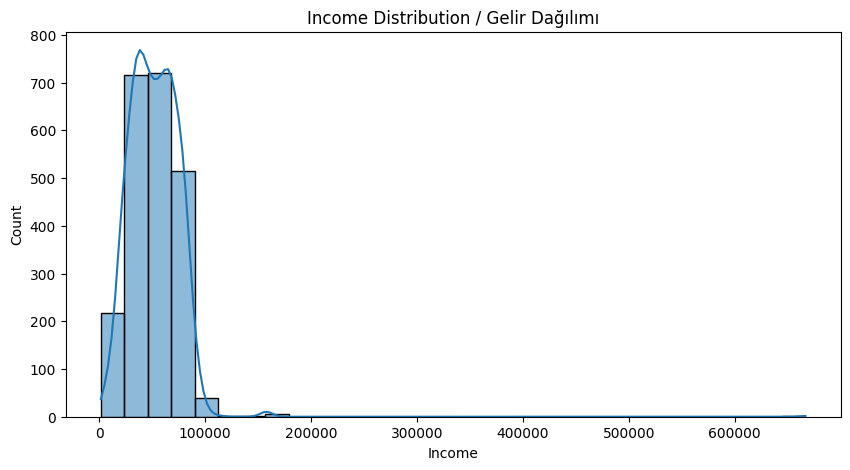

In [57]:
# Bazı grafikler - yaş, gelir ve harcamalar-Some visuals - Age, Income, Spendings
plt.figure(figsize=(10, 5))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title("Income Distribution / Gelir Dağılımı")
plt.show()

In [63]:
df = df.dropna()


In [65]:
# Gereksiz sütunları çıkar (ID, Name gibi)
df.drop(columns=["ID", "Z_CostContact", "Z_Revenue"], inplace=True)

In [67]:
# Yaş sütunu ekleyelim / Create Age feature
df["Age"] = 2025 - df["Year_Birth"]
df.drop(columns=["Year_Birth"], inplace=True)

In [69]:
# Kategorik değişkenleri sayısal hale getirelim / Encode categoricals
df = pd.get_dummies(df, drop_first=True)

In [71]:
# Ölçekleme / Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [73]:
# PCA ile Boyut İndirgeme / Dimensionality Reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

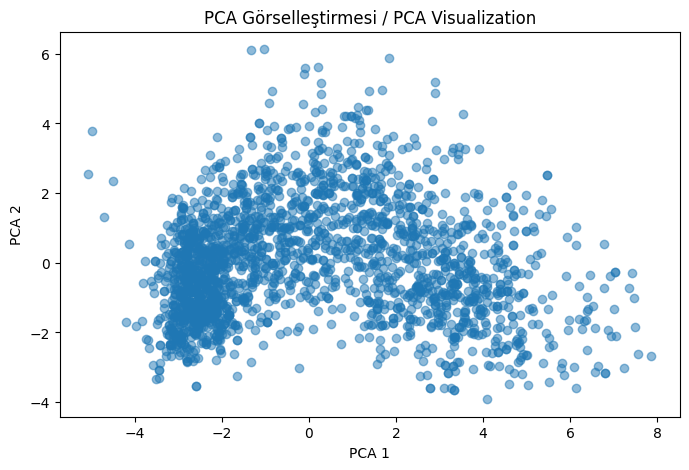

In [75]:
# PCA görselleştirmesi / PCA Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.title("PCA Görselleştirmesi / PCA Visualization")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [77]:
# Elbow yöntemi için SSE hesaplama
sse = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(pca_data)
    sse.append(km.inertia_)

C:\Users\aziz-\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aziz-\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aziz-\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aziz-\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

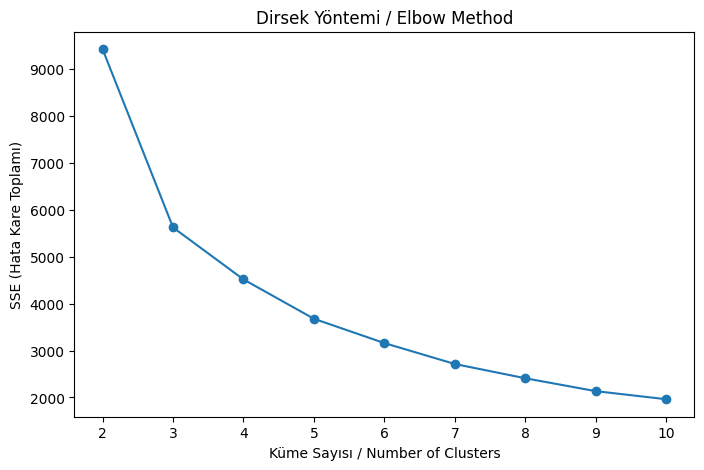

In [79]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sse, marker='o')
plt.title("Dirsek Yöntemi / Elbow Method")
plt.xlabel("Küme Sayısı / Number of Clusters")
plt.ylabel("SSE (Hata Kare Toplamı)")
plt.show()

In [81]:
# Silhouette skoru hesapla / Calculate silhouette score
print("\nSilhouette Skorları / Scores:")
for k in range(2, 6):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(pca_data)
    score = silhouette_score(pca_data, labels)
    print(f"K = {k}, Silhouette Score: {score:.3f}")


Silhouette Skorları / Scores:
K = 2, Silhouette Score: 0.505


C:\Users\aziz-\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aziz-\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K = 3, Silhouette Score: 0.479
K = 4, Silhouette Score: 0.403


C:\Users\aziz-\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aziz-\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K = 5, Silhouette Score: 0.374


In [83]:
# 4 küme seçiyoruz / We select 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(pca_data)

C:\Users\aziz-\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [85]:
# Küme etiketlerini orijinal veriye ekle / Add labels to original df
df["Cluster"] = clusters

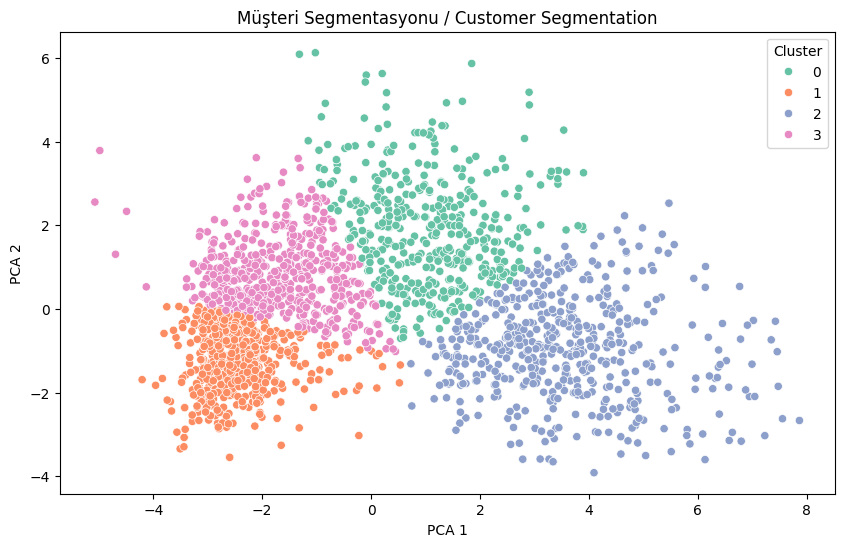

In [87]:
# PCA düzleminde kümeleri çiz / Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette="Set2")
plt.title("Müşteri Segmentasyonu / Customer Segmentation")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

In [89]:
# Her küme için ortalamaları görelim / Mean features per cluster
print("\nKüme Bazlı Ortalama Değerler / Average Values by Cluster:")
summary = df.groupby("Cluster").mean()
print(summary[["Age", "Income", "Kidhome", "Teenhome", "NumWebPurchases"]])



Küme Bazlı Ortalama Değerler / Average Values by Cluster:
               Age        Income   Kidhome  Teenhome  NumWebPurchases
Cluster                                                              
0        61.528908  61456.880086  0.139186  0.912206         6.670236
1        48.695652  30983.771337  0.848631  0.196457         1.904992
2        56.062837  77098.236984  0.046679  0.170557         5.165171
3        60.057793  43598.784588  0.632224  0.835377         3.288967


C:\Users\aziz-\AppData\Local\Temp\ipykernel_3660\1713056003.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cluster", data=df, palette="Set2")


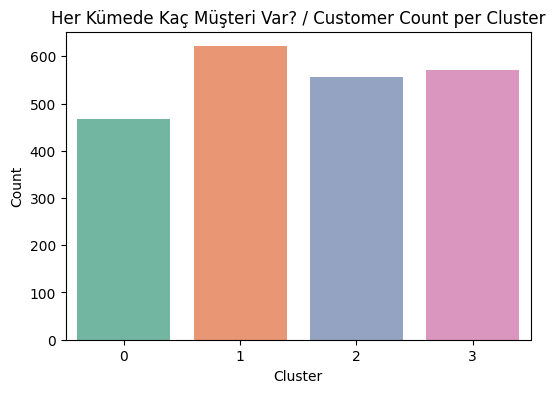

In [91]:
# Küme büyüklüklerini görselleştir / Cluster sizes
plt.figure(figsize=(6, 4))
sns.countplot(x="Cluster", data=df, palette="Set2")
plt.title("Her Kümede Kaç Müşteri Var? / Customer Count per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

C:\Users\aziz-\AppData\Local\Temp\ipykernel_3660\3198729761.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cluster", y="Income", data=df, estimator=np.mean, palette="coolwarm")


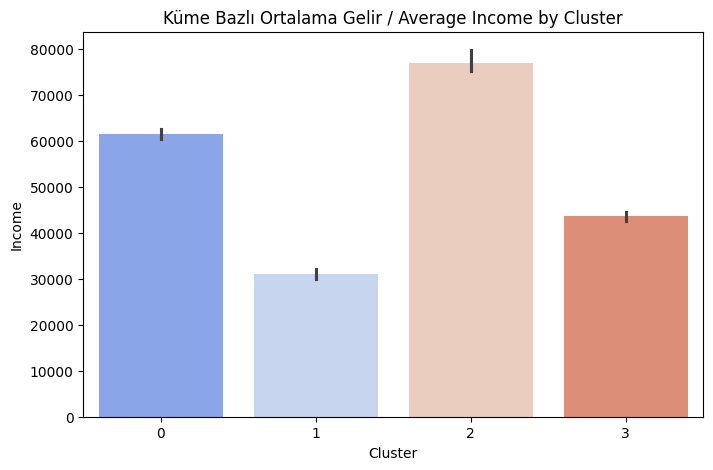

In [93]:
# Gelir dağılımı / Income distribution per cluster
plt.figure(figsize=(8, 5))
sns.barplot(x="Cluster", y="Income", data=df, estimator=np.mean, palette="coolwarm")
plt.title("Küme Bazlı Ortalama Gelir / Average Income by Cluster")
plt.show()

C:\Users\aziz-\AppData\Local\Temp\ipykernel_3660\2180227519.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TotalChildren", y="TotalSpending", data=df, palette="Set3")


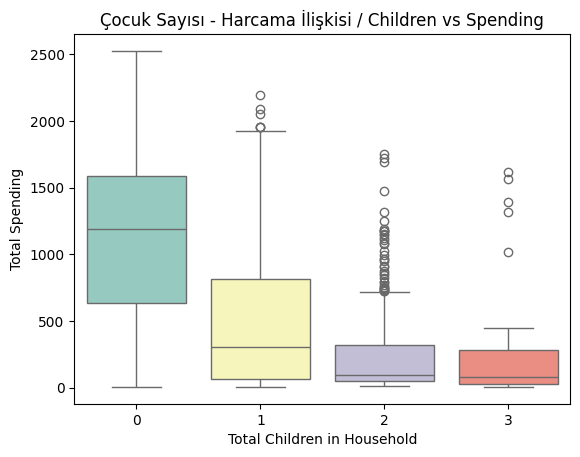

In [95]:
# Ailedeki çocuk sayısı vs harcama
df["TotalChildren"] = df["Kidhome"] + df["Teenhome"]
df["TotalSpending"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

sns.boxplot(x="TotalChildren", y="TotalSpending", data=df, palette="Set3")
plt.title("Çocuk Sayısı - Harcama İlişkisi / Children vs Spending")
plt.xlabel("Total Children in Household")
plt.ylabel("Total Spending")
plt.show()

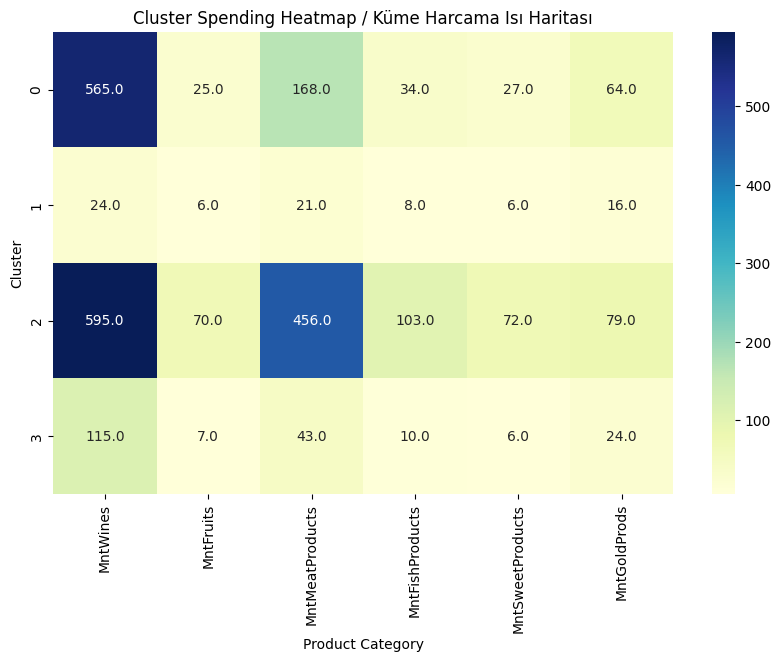

In [101]:
# Isı haritası (heatmap) ile küme karşılaştırması
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_avg_spend, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Cluster Spending Heatmap / Küme Harcama Isı Haritası")
plt.xlabel("Product Category")
plt.ylabel("Cluster")
plt.show()